In [138]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (20, 10)    # Set default figure size (width, height)
matplotlib.rcParams['font.size'] = 12               # Set default font size
matplotlib.rcParams['axes.titlesize'] = 20          # Set default title font size
matplotlib.rcParams['axes.labelsize'] = 20          # Set default label font size
plt.style.use('seaborn-v0_8-pastel')

In [2]:
# Read 2023 cvs files competitions
boulder_df = pd.read_csv("./competitions/world_cups_2023/2023_boulder.csv")
lead_df = pd.read_csv("./competitions/world_cups_2023/2023_lead.csv")
speed_df = pd.read_csv("./competitions/world_cups_2023/2023_speed.csv")

# Read the athletes file
athletes = pd.read_csv("./athlete_info_v2.csv")

### Data Cleaning

In [3]:
athletes.head(10)

,Name,AthleteUrl,Gender,Height,Active,Participations,Age,country
0,Liam HEALY,https://ifsc.results.info/#/athlete/2535,Men,-,2017,8,26,AUS
1,Dylan PARKS,https://ifsc.results.info/#/athlete/13853,Men,-,2022,13,18,AUS
2,Stefan SCHERZ,https://ifsc.results.info/#/athlete/1274,Men,179,2015,66,22,AUT
3,Jan-luca POSCH,https://ifsc.results.info/#/athlete/1245,Men,184,2012,83,26,AUT
4,Nicolai UZNIK,https://ifsc.results.info/#/athlete/1256,Men,173,2014,88,23,AUT
5,Jakob SCHUBERT,https://ifsc.results.info/#/athlete/1214,Men,176,2004,233,33,AUT
6,Nicolas COLLIN,https://ifsc.results.info/#/athlete/320,Men,179,2012,137,25,BEL
7,Simon LORENZI,https://ifsc.results.info/#/athlete/318,Men,168,2011,104,26,BEL
8,Hannes VAN DUYSEN,https://ifsc.results.info/#/athlete/373,Men,175,2018,53,19,BEL
9,Rodrigo IASI HANADA,https://ifsc.results.info/#/athlete/12903,Men,-,2021,20,21,BRA


In [4]:
athletes.shape

(751, 8)

In [5]:
athletes.dtypes

Name              object
AthleteUrl        object
Gender            object
Height            object
Active            object
Participations     int64
Age                int64
country           object
dtype: object

In [6]:
# Check the columns with '-' in it
(athletes == '-').any()

Name              False
AthleteUrl        False
Gender            False
Height             True
Active             True
Participations    False
Age               False
country           False
dtype: bool

In [7]:
athletes[athletes['Active'] == '-']

,Name,AthleteUrl,Gender,Height,Active,Participations,Age,country
746,Mengli ZHANG,https://ifsc.results.info/#/athlete/15133,Women,-,-,0,20,CHN


In [8]:
# Remove the above value
idx = athletes[athletes['Active'] == '-'].index
athletes = athletes.drop(idx)

In [9]:
# Change data types from Object to Numeric type
athletes['Height'] = pd.to_numeric(athletes['Height'], errors='coerce')
athletes['Active'] = athletes['Active'].astype('Int64')

In [10]:
# Check the columns with '-' in it
(athletes == '-').any()

Name              False
AthleteUrl        False
Gender            False
Height            False
Active            False
Participations    False
Age               False
country           False
dtype: boolean

In [11]:
athletes.dtypes

Name               object
AthleteUrl         object
Gender             object
Height            float64
Active              Int64
Participations      int64
Age                 int64
country            object
dtype: object

In [12]:
athletes.isna().sum()

Name                0
AthleteUrl          0
Gender              0
Height            424
Active              0
Participations      0
Age                 0
country             0
dtype: int64

There are 424 records with no height. In this case, I will use the mean value per gender, and country to fill in the missing values.

In [13]:
# Create a copy of the data frame to fill in with the mean values
athletes_v2 = athletes
athletes_v2['Height'] = athletes['Height'].fillna(athletes.groupby(['country', 'Gender'])['Height'].transform('mean'))
athletes_v2.isna().sum()

Name               0
AthleteUrl         0
Gender             0
Height            94
Active             0
Participations     0
Age                0
country            0
dtype: int64

There are still 94 missing values after adding the mean values per gender and country. This mean that there are still athletes with no height information. For now, I will leave as it.

In [14]:
boulder_df.head()

,Rank,Name,Unnamed: 2,Country,Qualification,Semi-final,Final,event_name,date,gender
0,1.0,MEJDI,SCHALCK,FRA,4t4z 6 6,1t4z 2 9,2t3z 7 7,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
1,2.0,HANNES,VAN DUYSEN,BEL,3t5z 9 15,1t4z 8 14,1t3z 2 11,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
2,3.0,PAUL,JENFT,FRA,4t5z 10 9,2t4z 11 13,1t3z 3 3,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
3,4.0,KOKORO,FUJII,JPN,4t5z 8 17,1t2z 3 4,0t3z 0 9,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
4,5.0,SORATO,ANRAKU,JPN,3t5z 4 17,1t4z 1 12,0t3z 0 11,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men


In [15]:
lead_df.head()

,Rank,Name,Unnamed: 2,Country,Qualification,Semi-final,Final,event_name,date,gender
0,1.0,SASCHA,LEHMANN,SUI,4.03,43+,44+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
1,2.0,ALEXANDER,MEGOS,GER,4.03,39+,44+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
2,3.0,JAKOB,SCHUBERT,AUT,5.48,43,42+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
3,4.0,SORATO,ANRAKU,JPN,2.5,40,42+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
4,5.0,MEJDI,SCHALCK,FRA,15.2,40,42+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men


In [16]:
speed_df.head()

,Rank,Name,Unnamed: 2,Country,Qualification,Final,event_name,date,gender
0,1.0,VEDDRIQ,LEONARDO,INA,4.98 (wr) (asr),5.01,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
1,2.0,JINBAO,LONG,CHN,5.40,5.12,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
2,3.0,XINSHANG,WANG,CHN,5.17,5.11,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
3,4.0,JIANGUO,LONG,CHN,5.130,6.37,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
4,5.0,EUNCHEOL,SHIN,KOR,5.131,8.69 (5.131),IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men


In [17]:
# Change columns names
boulder_df = boulder_df.rename(columns={"Name": "FName", "Unnamed: 2":"LName"})
lead_df = lead_df.rename(columns={"Name": "FName", "Unnamed: 2":"LName"})
speed_df = speed_df.rename(columns={"Name": "FName", "Unnamed: 2":"LName"})

print(boulder_df.columns)
print(lead_df.columns)
print(speed_df.columns)

Index(['Rank', 'FName', 'LName', 'Country', 'Qualification', 'Semi-final',
       'Final', 'event_name', 'date', 'gender'],
      dtype='object')
Index(['Rank', 'FName', 'LName', 'Country', 'Qualification', 'Semi-final',
       'Final', 'event_name', 'date', 'gender'],
      dtype='object')
Index(['Rank', 'FName', 'LName', 'Country', 'Qualification', 'Final',
       'event_name', 'date', 'gender'],
      dtype='object')


In [18]:
# Change the event name to display only the city and year
boulder_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    242
IFSC_World_Cup_Innsbruck_2023         203
IFSC_World_Cup_Brixen_2023            170
IFSC_World_Cup_Prague_2023            168
IFSC_World_Cup_Hachioji_2023          167
28 April - 30 April 2023              165
IFSC_World_Cup_Salt_Lake_City_2023    126
Name: count, dtype: int64

There is a string in the events_name columns `28 April - 30 April 2023` which does not make sense. Let's further explore this rows

In [19]:
boulder_df[boulder_df['event_name'] == '28 April - 30 April 2023']

,Rank,FName,LName,Country,Qualification,Semi-final,Final,event_name,date,gender
167,1.0,MEJDI,SCHALCK,FRA,4t5z 9 8,2t3z 2 7,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
168,2.0,TOMOA,NARASAKI,JPN,4t5z 8 12,2t3z 6 10,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
169,3.0,JONGWON,CHON,KOR,4t4z 7 6,2t2z 2 2,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
170,4.0,DOHYUN,LEE,KOR,4t5z 7 11,1t2z 1 9,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
171,5.0,MANUEL,CORNU,FRA,4t5z 9 13,1t2z 4 5,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
...,...,...,...,...,...,...,...,...,...,...
327,69.0,DASOM,YUN,KOR,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN
328,75.0,PRATEEKSHA,ARUN,IND,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN
329,75.0,WAI-MUI,LING,HKG,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN
330,75.0,ELIZABETH,SEPULVEDA,PUR,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN


After googling a bit, the boulder final round of the Seoul 2023 world cup was cancelled due to weather; therefore, there is not final results and the semifinals results were used to determined the winners.
- [ifsc websit](https://www.ifsc-climbing.org/index.php/component/ifsc/?view=event&WetId=1292)
- [olympics website](https://olympics.com/en/news/mejdi-schalck-nonaka-miho-win-boulder-seoul-results)

To fix this, I will shift those values to the right, and then copy the semi-final results to the final column.

In [20]:
# Shifts the values from row 167 to 331 to the right, then copy the values from the semi-final columns to the final column.
starting_row = 167
ending_row = 331

# Shift columns
boulder_df.iloc[starting_row:ending_row+1, 7:] = boulder_df.iloc[starting_row:ending_row+1, 6:-1].values
boulder_df.loc[starting_row:ending_row, 'Final'] = boulder_df.loc[starting_row:ending_row,'Semi-final']

In [21]:
boulder_df.iloc[starting_row:ending_row]

,Rank,FName,LName,Country,Qualification,Semi-final,Final,event_name,date,gender
167,1.0,MEJDI,SCHALCK,FRA,4t5z 9 8,2t3z 2 7,2t3z 2 7,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
168,2.0,TOMOA,NARASAKI,JPN,4t5z 8 12,2t3z 6 10,2t3z 6 10,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
169,3.0,JONGWON,CHON,KOR,4t4z 7 6,2t2z 2 2,2t2z 2 2,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
170,4.0,DOHYUN,LEE,KOR,4t5z 7 11,1t2z 1 9,1t2z 1 9,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
171,5.0,MANUEL,CORNU,FRA,4t5z 9 13,1t2z 4 5,1t2z 4 5,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
...,...,...,...,...,...,...,...,...,...,...
326,69.0,TSENG-SHUN,WONG,HKG,0t1z 0 3,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women
327,69.0,DASOM,YUN,KOR,0t0z 0 0,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women
328,75.0,PRATEEKSHA,ARUN,IND,0t0z 0 0,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women
329,75.0,WAI-MUI,LING,HKG,0t0z 0 0,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women


In [22]:
boulder_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    242
IFSC_World_Cup_Innsbruck_2023         203
IFSC_World_Cup_Brixen_2023            170
IFSC_World_Cup_Prague_2023            168
IFSC_World_Cup_Hachioji_2023          167
IFSC_World_Cup_Seoul_2023             165
IFSC_World_Cup_Salt_Lake_City_2023    126
Name: count, dtype: int64

In [23]:
lead_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    230
IFSC_World_Cup_Innsbruck_2023         200
IFSC_World_Cup_Villars_2023           181
IFSC_World_Cup_Chamonix_2023          176
IFSC_World_Cup_Briançon_2023          143
IFSC_World_Cup_Koper_2023             122
IFSC_World_Cup_Wujiang_2023            93
Name: count, dtype: int64

In [24]:
speed_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    136
IFSC_World_Cup_Villars_2023           133
IFSC_World_Cup_Chamonix_2023          129
IFSC_World_Cup_Seoul_2023             122
IFSC_World_Cup_Jakarta_2023           119
IFSC_World_Cup_Salt_Lake_City_2023    113
IFSC_World_Cup_Wujiang_2023            85
Name: count, dtype: int64

In [25]:
# Normalize event names to city_year
def normalize_event_name(event_name):
   return event_name.split("_", 3)[2:][1]

In [26]:
boulder_df['event_name'] = boulder_df['event_name'].apply(normalize_event_name)
lead_df['event_name'] = lead_df['event_name'].apply(normalize_event_name)
speed_df['event_name'] = speed_df['event_name'].apply(normalize_event_name)

In [27]:
boulder_df['event_name'].value_counts()

event_name
Bern_2023              242
Innsbruck_2023         203
Brixen_2023            170
Prague_2023            168
Hachioji_2023          167
Seoul_2023             165
Salt_Lake_City_2023    126
Name: count, dtype: int64

In [28]:
lead_df['event_name'].value_counts()

event_name
Bern_2023         230
Innsbruck_2023    200
Villars_2023      181
Chamonix_2023     176
Briançon_2023     143
Koper_2023        122
Wujiang_2023       93
Name: count, dtype: int64

In [29]:
speed_df['event_name'].value_counts()

event_name
Bern_2023              136
Villars_2023           133
Chamonix_2023          129
Seoul_2023             122
Jakarta_2023           119
Salt_Lake_City_2023    113
Wujiang_2023            85
Name: count, dtype: int64

In [30]:
# Let's add new columns for start and end date for competitions
def extract_dates(df, date_column):
    # Extract start and end dates
    df[['start_date', 'end_date']] = df[date_column].str.extract(r'(\d+ \w+) - (\d+ \w+ \d+)')

    # Extract the year from the end_date and add it to start_date
    df['start_date'] = df['start_date'] + ' ' + df['end_date'].str.split().str[-1]

    # Convert to datetime data type
    df['start_date'] = pd.to_datetime(df['start_date'], format='%d %B %Y')
    df['end_date'] = pd.to_datetime(df['end_date'], format='%d %B %Y')

    return df

In [31]:
boulder_df = extract_dates(boulder_df, 'date')
lead_df = extract_dates(lead_df, 'date')
speed_df = extract_dates(speed_df, 'date')

In [32]:
# Add a column with the event duration
boulder_df['event_duration'] = (boulder_df['end_date'] - boulder_df['start_date']).dt.days
lead_df['event_duration'] = (lead_df['end_date'] - lead_df['start_date']).dt.days
speed_df['event_duration'] = (speed_df['end_date'] - speed_df['start_date']).dt.days

In [33]:
# Count number of 'dns' occurrences
boulder_df.eq('dns').sum()

Rank              0
FName             0
LName             0
Country           0
Qualification     9
Semi-final        0
Final             0
event_name        0
date              0
gender            0
start_date        0
end_date          0
event_duration    0
dtype: int64

In [26]:
lead_df.eq('dns').sum()

Rank               0
FName              0
LName              0
Country            0
Qualification     12
Semi-final         0
Final              0
event_name         0
date               0
gender             0
start_date         0
end_date           0
event_duration     0
dtype: int64

In [27]:
speed_df.eq('dns').sum()

Rank              0
FName             0
LName             0
Country           0
Qualification     4
Final             0
event_name        0
date              0
gender            0
start_date        0
end_date          0
event_duration    0
dtype: int64

In [34]:
# Remove athletes with 'dns' status in qualification column for all diciplines
boulder_df = boulder_df[boulder_df['Qualification'] != 'dns']
lead_df = lead_df[lead_df['Qualification'] != 'dns']
speed_df = speed_df[speed_df['Qualification'] != 'dns']

In [42]:
lead_df.head(10)

,Rank,FName,LName,Country,Qualification,Semi-final,Final,event_name,date,gender,start_date,end_date,event_duration
0,1.0,SASCHA,LEHMANN,SUI,4.03,43+,44+,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
1,2.0,ALEXANDER,MEGOS,GER,4.03,39+,44+,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
2,3.0,JAKOB,SCHUBERT,AUT,5.48,43,42+,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
3,4.0,SORATO,ANRAKU,JPN,2.5,40,42+,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
4,5.0,MEJDI,SCHALCK,FRA,15.2,40,42+,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
5,6.0,SATONE,YOSHIDA,JPN,4.03,39+,42+,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
6,7.0,MASAHIRO,HIGUCHI,JPN,14.07,42+,42,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
7,8.0,ALBERTO,GINÉS LÓPEZ,ESP,22.05,40,42,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
8,9.0,TAISEI,HOMMA,JPN,7.65,42,40+,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4
9,10.0,AO,YURIKUSA,JPN,9.87,39+,NaN,Innsbruck_2023,14 June - 18 June 2023,Men,2023-06-14,2023-06-18,4


In [43]:
lead_df.tail(10)

,Rank,FName,LName,Country,Qualification,Semi-final,Final,event_name,date,gender,start_date,end_date,event_duration
1135,36.0,TEREZA,SIRUCKOVA,CZE,32.15,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1136,37.0,ANNA MARIA,APEL,GER,34.21,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1137,38.0,ELISKA,ADAMOVSKA,CZE,36.28,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1138,39.0,CHUNHUA,WU,CHN,36.74,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1139,40.0,ZIHAN,HUANG,CHN,36.99,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1140,41.0,ROXY,PERRY,AUS,40.39,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1141,42.0,HONGCHUN,XIANG,CHN,41.73,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1142,43.0,ANISHA,VERMA,IND,42.21,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1143,44.0,YIXIN,LIU,CHN,42.43,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2
1144,45.0,SANIYA FAROOQUE,SHAIKH,IND,44.24,NaN,NaN,Wujiang_2023,22 September - 24 September 2023,Women,2023-09-22,2023-09-24,2


In [44]:
lead_df.dtypes

Rank                     float64
FName                     object
LName                     object
Country                   object
Qualification             object
Semi-final                object
Final                     object
event_name                object
date                      object
gender                    object
start_date        datetime64[ns]
end_date          datetime64[ns]
event_duration             int64
dtype: object

In [45]:
speed_df.head(10)

,Rank,FName,LName,Country,Qualification,Final,event_name,date,gender,start_date,end_date,event_duration
0,1.0,VEDDRIQ,LEONARDO,INA,4.98 (wr) (asr),5.01,Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
1,2.0,JINBAO,LONG,CHN,5.40,5.12,Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
2,3.0,XINSHANG,WANG,CHN,5.17,5.11,Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
3,4.0,JIANGUO,LONG,CHN,5.130,6.37,Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
4,5.0,EUNCHEOL,SHIN,KOR,5.131,8.69 (5.131),Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
5,6.0,PENG,WU,CHN,5.231,6.13 (5.198),Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
6,7.0,ASPAR,ASPAR,INA,5.22,5.24 (5.220),Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
7,8.0,MATTEO,ZURLONI,ITA,5.230 (er),8.04 (5.230),Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
8,9.0,SAMUEL,WATSON,USA,5.02 (par),5.42 (5.29),Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2
9,10.0,RAHMAD,ADI MULYONO,INA,5.239,5.29 (5.239),Seoul_2023,28 April - 30 April 2023,Men,2023-04-28,2023-04-30,2


In [46]:
# Make new columns with only the numeric values
speed_df['qlf1'] = speed_df['Qualification'].str.extract(r'(\d+\.\d+)').astype('float64')
speed_df['final1'] = speed_df['Final'].str.extract(r'(\d+\.\d+)').astype('float64')

In [54]:
boulder_df.isna().sum()

Rank                 0
FName                0
LName                0
Country              0
Qualification        0
Semi-final         950
Final             1121
event_name           0
date                 0
gender               0
start_date           0
end_date             0
event_duration       0
dtype: int64

In [55]:
lead_df.isna().sum()

Rank                 0
FName                0
LName                0
Country              0
Qualification        0
Semi-final         768
Final             1017
event_name           0
date                 0
gender               0
start_date           0
end_date             0
event_duration       0
dtype: int64

In [56]:
speed_df.isna().sum()

Rank                0
FName               0
LName               0
Country             0
Qualification       0
Final             609
event_name          0
date                0
gender              0
start_date          0
end_date            0
event_duration      0
qlf1               35
final1            613
dtype: int64

All three data frames have NaN values for he event results, this mean that the athlete did not qualified for the next stage of the competition. For the purpose of this analysis, I will leave the `NaN` values as it.

### EDA

Let's start exploring the athletes csv file. The athletes csv file contains information of all athletes that participated during the world cup 2023 competitions.

#### Athletes

In [69]:
athletes_v2.shape

(750, 8)

In [70]:
athletes_v2.describe()

,Height,Active,Participations,Age
count,656.000000,750.0,750.000000,750.000000
mean,169.653322,2016.822667,36.206667,22.512000
std,7.806787,4.628728,36.423282,4.510393
min,149.000000,1997.0,1.000000,16.000000
25%,163.000000,2014.0,11.000000,19.000000
50%,170.000000,2017.0,22.000000,22.000000
75%,175.125000,2021.0,52.000000,25.000000
max,198.000000,2023.0,247.000000,39.000000


In [77]:
# Count the Men and Women athletes
print(athletes_v2['Gender'].value_counts())
print(athletes_v2['Gender'].value_counts(normalize=True))

Gender
Men      425
Women    325
Name: count, dtype: int64
Gender
Men      0.566667
Women    0.433333
Name: proportion, dtype: float64


In [84]:
# Count the numbers of participating countries
print("Total participating countries during the 2023 world cups:", len(athletes_v2['country'].unique()))

Total participating countries during the 2023 world cups: 67


In [85]:
# Top 10 contries with most participating athletesd
athletes_v2['country'].value_counts().head(10)

country
JPN    48
FRA    45
USA    44
KOR    38
ITA    35
INA    35
CHN    34
GER    31
AUT    30
SLO    24
Name: count, dtype: int64

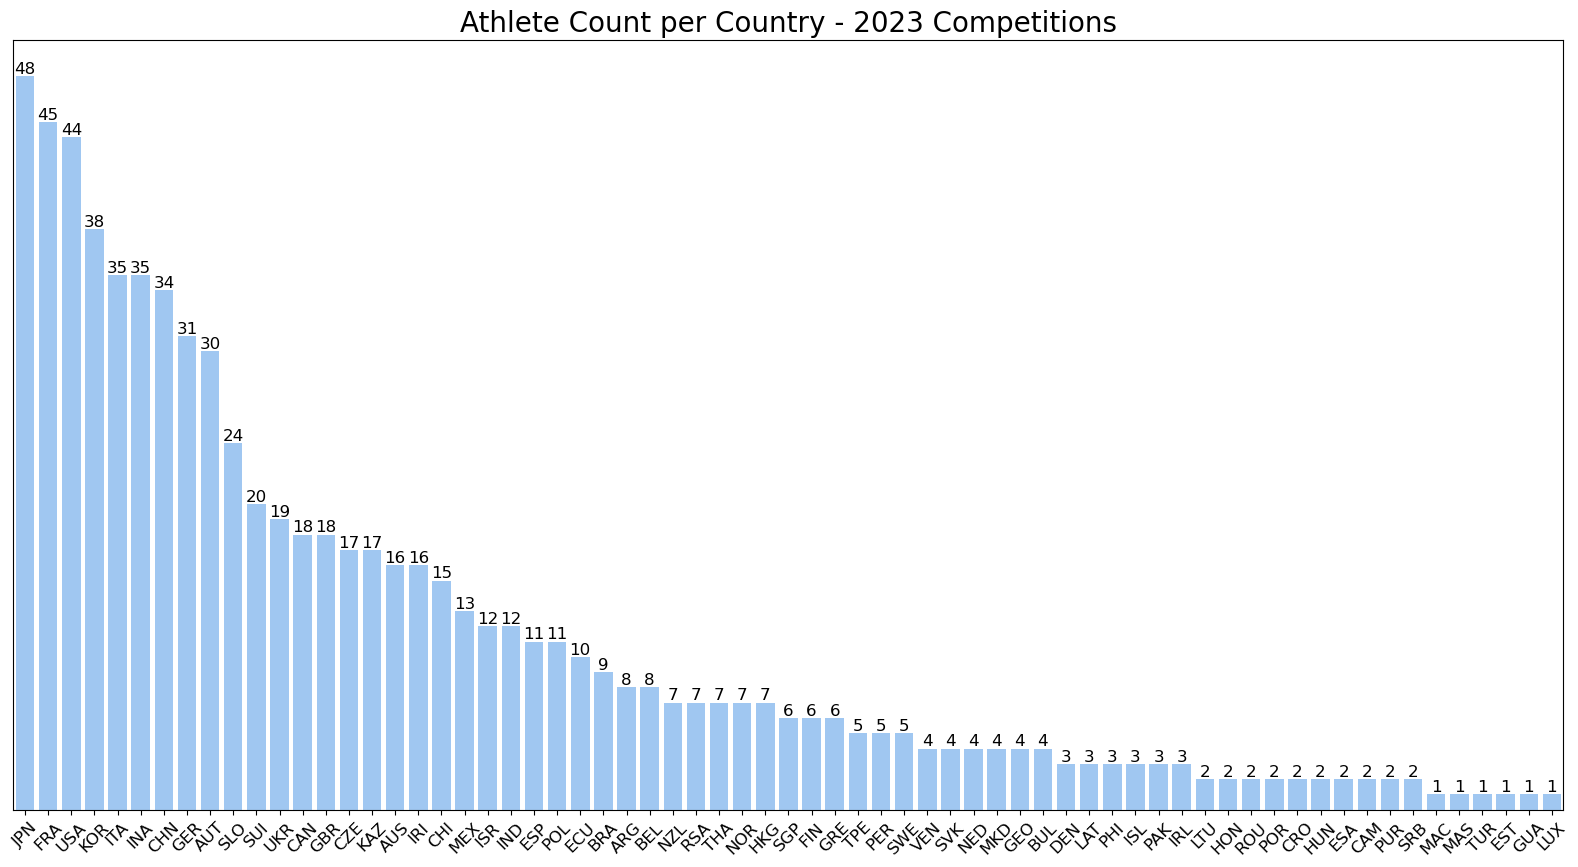

In [144]:
data = athletes_v2['country'].value_counts()
title = "Athlete Count per Country - 2023 Competitions"

ax = sns.barplot(data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title, color='black')
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig(f'graphs/{title}.png')
plt.show()

#### Boulder

In [90]:
boulder_df.shape

(1232, 13)

In [93]:
boulder_df['event_name'].value_counts()

event_name
Bern_2023              239
Innsbruck_2023         202
Brixen_2023            169
Prague_2023            167
Hachioji_2023          165
Seoul_2023             165
Salt_Lake_City_2023    125
Name: count, dtype: int64

In [107]:
boulder_df.groupby(['event_name', 'gender'])['Country'].count()

event_name           gender
Bern_2023            Men       130
                     Women     109
Brixen_2023          Men        90
                     Women      79
Hachioji_2023        Men        91
                     Women      74
Innsbruck_2023       Men       110
                     Women      92
Prague_2023          Men        94
                     Women      73
Salt_Lake_City_2023  Men        64
                     Women      61
Seoul_2023           Men        87
                     Women      78
Name: Country, dtype: int64

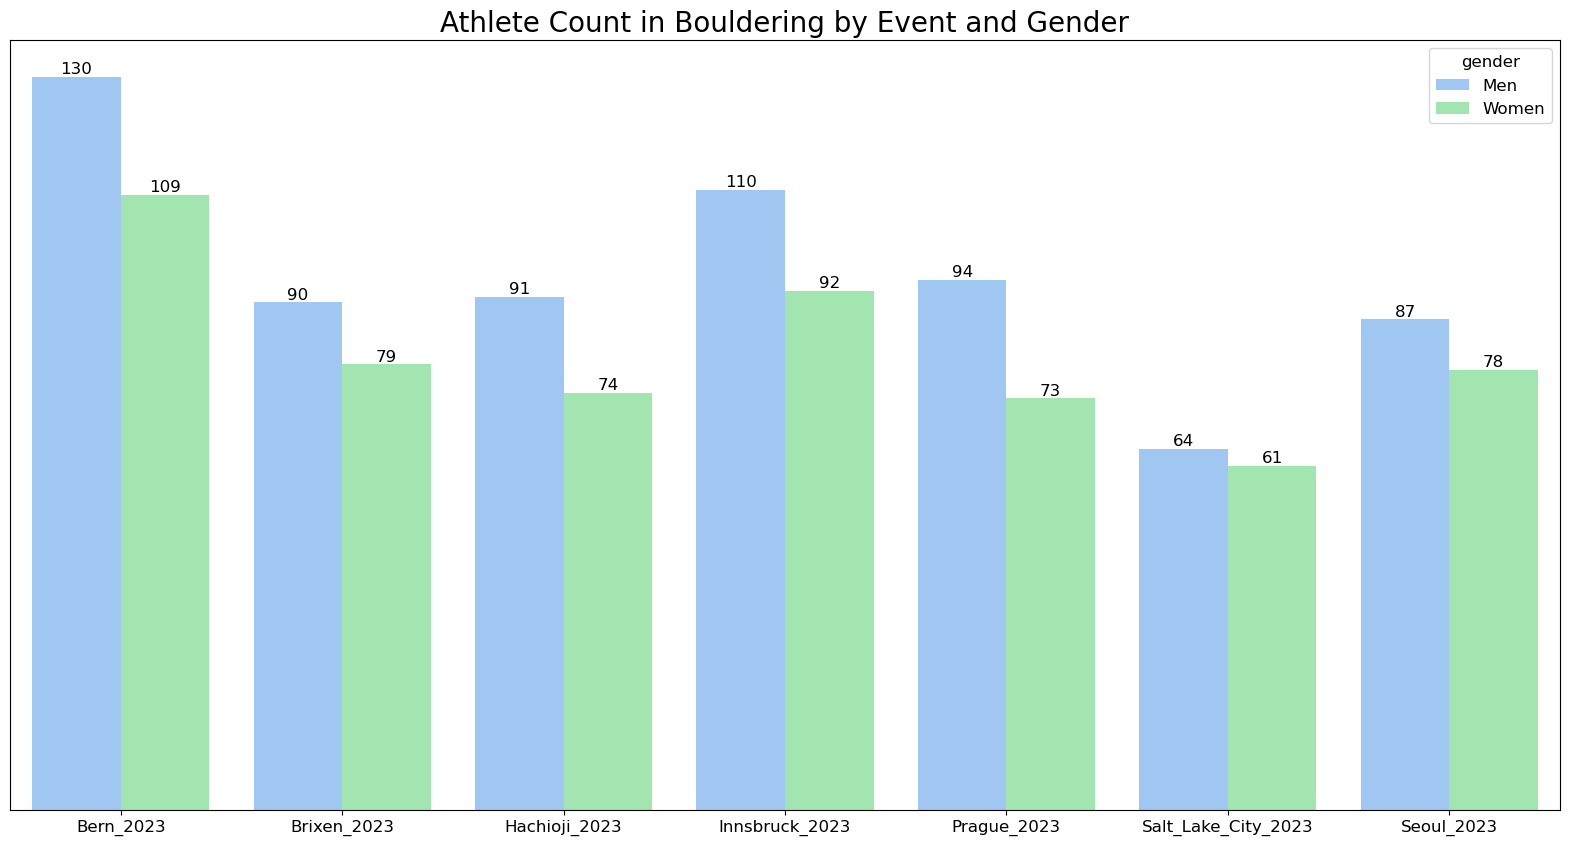

In [153]:
data = boulder_df.groupby(['event_name', 'gender'])['Country'].count().reset_index()

title = "Athlete Count in Bouldering by Event and Gender"

ax = sns.barplot(x='event_name', y='Country', hue='gender', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

# Save the plot as a PNG file
plt.savefig(f'graphs/{title}.png')
plt.show()


In [146]:
boulder_df['event_duration'].describe()

count    1232.000000
mean        4.073864
std         3.475372
min         2.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: event_duration, dtype: float64

In [148]:
boulder_df['event_duration'].value_counts()

event_duration
2     791
11    239
4     202
Name: count, dtype: int64

#### Lead

In [149]:
lead_df.shape

(1133, 13)

In [150]:
lead_df['event_name'].value_counts()

event_name
Bern_2023         225
Innsbruck_2023    199
Villars_2023      177
Chamonix_2023     175
Briançon_2023     143
Koper_2023        121
Wujiang_2023       93
Name: count, dtype: int64

In [151]:
lead_df.groupby(['event_name', 'gender'])['Country'].count()

event_name      gender
Bern_2023       Men       125
                Women     100
Briançon_2023   Men        76
                Women      67
Chamonix_2023   Men        92
                Women      83
Innsbruck_2023  Men       110
                Women      89
Koper_2023      Men        59
                Women      62
Villars_2023    Men        94
                Women      83
Wujiang_2023    Men        48
                Women      45
Name: Country, dtype: int64

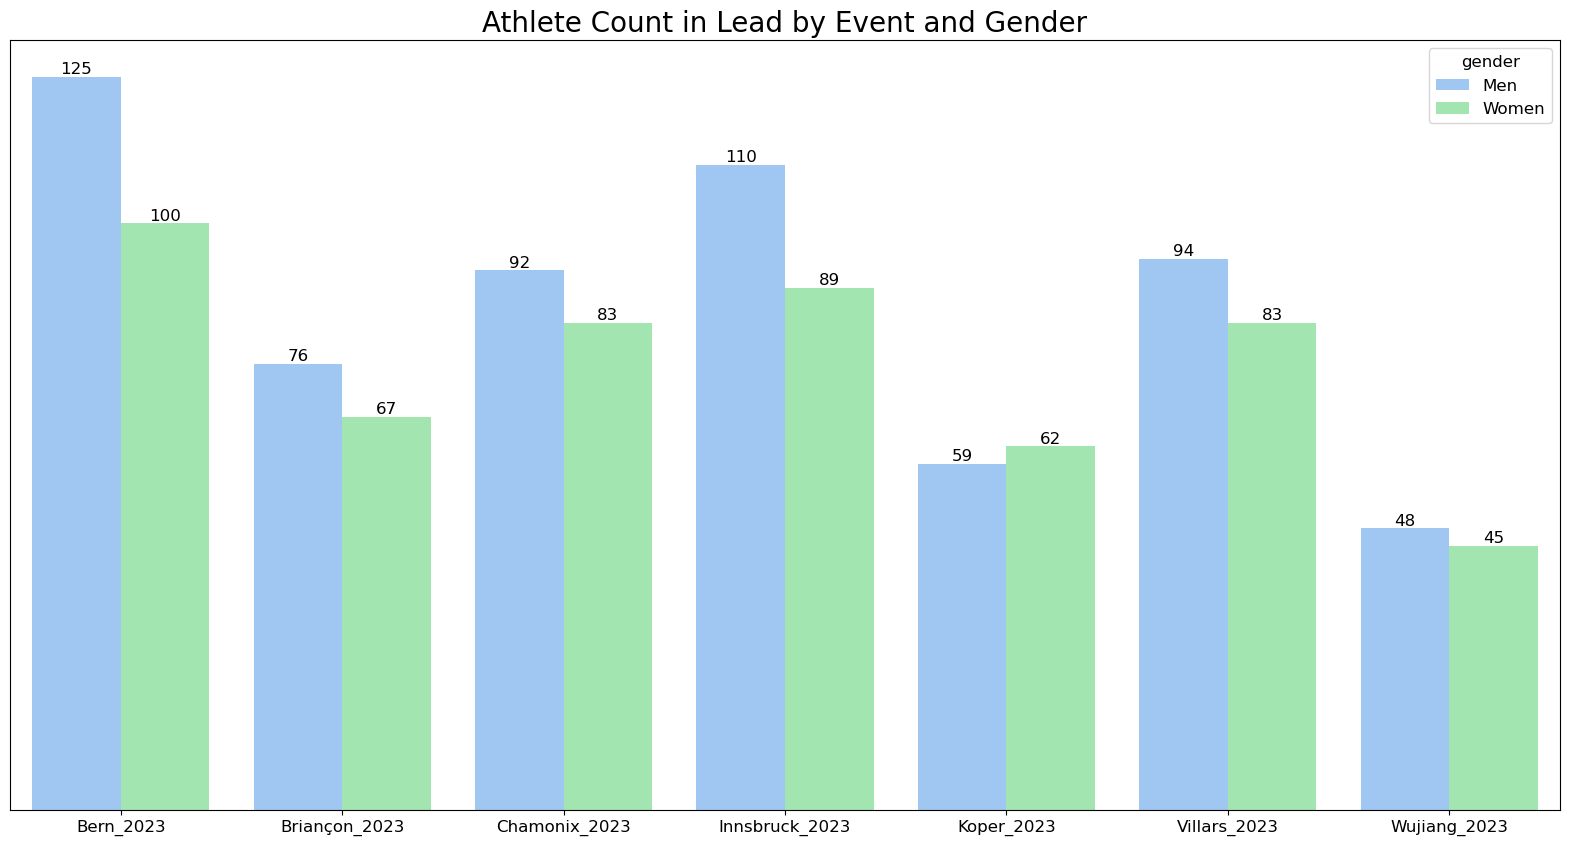

In [154]:
data = lead_df.groupby(['event_name', 'gender'])['Country'].count().reset_index()

title = "Athlete Count in Lead by Event and Gender"

ax = sns.barplot(x='event_name', y='Country', hue='gender', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

# Save the plot as a PNG file
plt.savefig(f'graphs/{title}.png')
plt.show()


In [155]:
lead_df['event_duration'].describe()

count    1133.000000
mean        3.905560
std         3.660854
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: event_duration, dtype: float64

In [156]:
lead_df['event_duration'].value_counts()

event_duration
2     445
1     264
11    225
4     199
Name: count, dtype: int64

#### Speed

In [157]:
speed_df.shape

(833, 14)

In [158]:
speed_df['event_name'].value_counts()

event_name
Bern_2023              135
Villars_2023           131
Chamonix_2023          129
Seoul_2023             122
Jakarta_2023           119
Salt_Lake_City_2023    112
Wujiang_2023            85
Name: count, dtype: int64

In [159]:
speed_df.groupby(['event_name', 'gender'])['Country'].count()

event_name           gender
Bern_2023            Men       77
                     Women     58
Chamonix_2023        Men       77
                     Women     52
Jakarta_2023         Men       72
                     Women     47
Salt_Lake_City_2023  Men       64
                     Women     48
Seoul_2023           Men       72
                     Women     50
Villars_2023         Men       77
                     Women     54
Wujiang_2023         Men       50
                     Women     35
Name: Country, dtype: int64

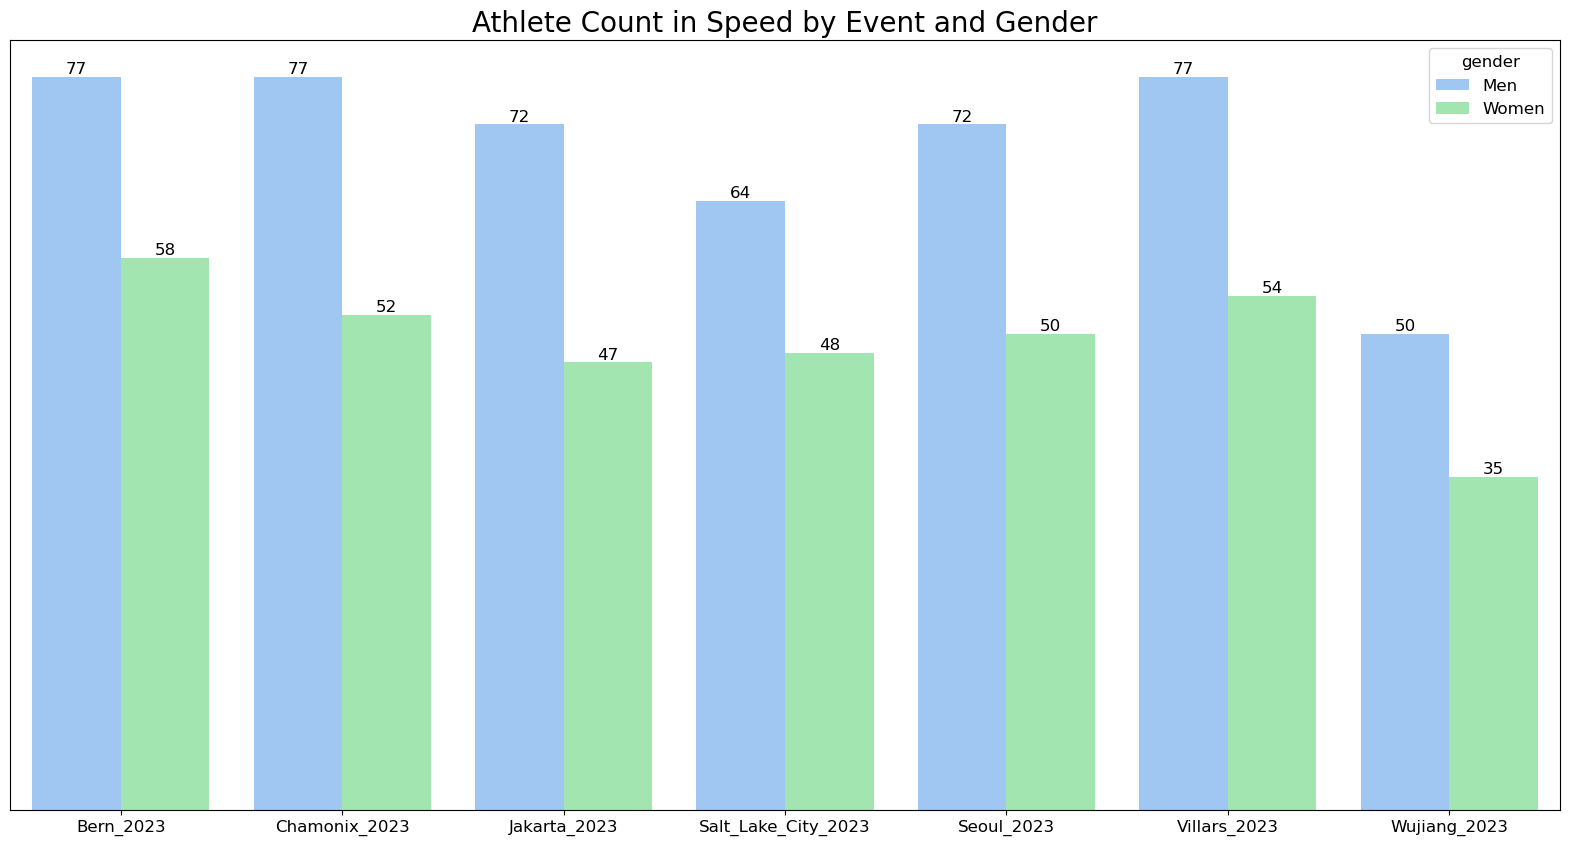

In [160]:
data = speed_df.groupby(['event_name', 'gender'])['Country'].count().reset_index()

title = "Athlete Count in Speed by Event and Gender"

ax = sns.barplot(x='event_name', y='Country', hue='gender', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

# Save the plot as a PNG file
plt.savefig(f'graphs/{title}.png')
plt.show()

In [161]:
speed_df['event_duration'].describe()

count    833.000000
mean       3.315726
std        3.398947
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max       11.000000
Name: event_duration, dtype: float64

In [162]:
speed_df['event_duration'].value_counts()

event_duration
2     579
11    135
1     119
Name: count, dtype: int64

In [178]:
speed_df.groupby(['gender'])[['qlf1','final1']].describe()

qlf1                                                        final1  \
        count      mean       std   min     25%     50%   75%    max  count   
gender                                                                        
Men     462.0  5.956340  0.923299  4.97  5.3885  5.6730  6.18  12.13  108.0   
Women   336.0  8.316402  1.444823  6.30  7.3375  7.9915  8.95  16.62  112.0   

                                                              
            mean       std   min    25%    50%    75%    max  
gender                                                        
Men     5.864870  1.048599  4.95  5.195  5.340  6.355   9.22  
Women   7.517875  1.135870  6.25  6.855  7.245  7.640  12.81